In [2]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models, datasets
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

# Provide a short description of the dataset and justify why you selected it.

The dataset used is the **Fashion MNIST dataset**. This dataset is a collection of 60,000 training images and 10,000 test images, each being a 28x28 grayscale image of a fashion item. There are 10 classes of items, such as T-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

This dataset was selected because:

1.  **It is a good benchmark for image classification:** Fashion MNIST is a commonly used dataset for evaluating image classification models. It is more challenging than the original MNIST dataset (digits) but still relatively small and computationally feasible for experimenting with different CNN architectures like ResNet and DenseNet on Google Colab.
2.  **It provides a reasonable complexity:** The images are simple grayscale and low-resolution, but the variations within each class and similarities between different classes (e.g., shirt and t-shirt) make it a non-trivial classification task. This allows for a meaningful comparison of the performance of different model complexities.
3.  **It is readily available in Keras/TensorFlow:** The dataset is easily accessible through `tf.keras.datasets`, which simplifies the data loading and preprocessing steps.
4.  **It allows for quick iteration:** Due to its relatively small size, training models on Fashion MNIST is faster than on larger datasets like ImageNet, enabling quicker experimentation and comparison of different model architectures.

In [5]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Flip both axes
    layers.RandomRotation(0.25),                   # Rotate up to 25%
    layers.RandomZoom(0.3),                        # Zoom in/out
    layers.RandomTranslation(0.2, 0.2),            # Shift images
    layers.RandomContrast(0.3),                    # Vary contrast
    layers.RandomBrightness(0.3),                  # Vary brightness
    layers.Resizing(28, 28),                     # Resize back to target
    layers.Rescaling(1./255)                       # Normalize pixel values
])

In [5]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
    shortcut = x
    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Build a ResNet-like model
input_shape = (28, 28, 1)
inputs = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(32, 3, strides=1, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = residual_block(x, 32)
x = residual_block(x, 32)

x = residual_block(x, 64, stride=2, conv_shortcut=True)
x = residual_block(x, 64)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation='softmax')(x)

resnet_model = models.Model(inputs=inputs, outputs=outputs)

resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      1,056 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │      9,248 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 28, 28,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │      9,248 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │      1,056 │ activation_2[0][

 Total params: 178,058 (695.54 KB)

 Trainable params: 176,842 (690.79 KB)

 Non-trainable params: 1,216 (4.75 KB)

In [6]:

resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = resnet_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.7705 - loss: 0.6623 - val_accuracy: 0.8649 - val_loss: 0.3826
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8912 - loss: 0.3029 - val_accuracy: 0.8616 - val_loss: 0.3946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9122 - loss: 0.2486 - val_accuracy: 0.8515 - val_loss: 0.4333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9190 - loss: 0.2246 - val_accuracy: 0.9013 - val_loss: 0.2681
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9272 - loss: 0.2030 - val_accuracy: 0.9055 - val_loss: 0.2694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9332 - loss: 0.1876 - val_accuracy: 0.8928 - val_loss: 0.3104
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9387 - loss: 0.1693 - val_accuracy: 0.9197 - val_loss: 0.2336
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9432 - loss:

Text(0.5, 0, 'Epoch')

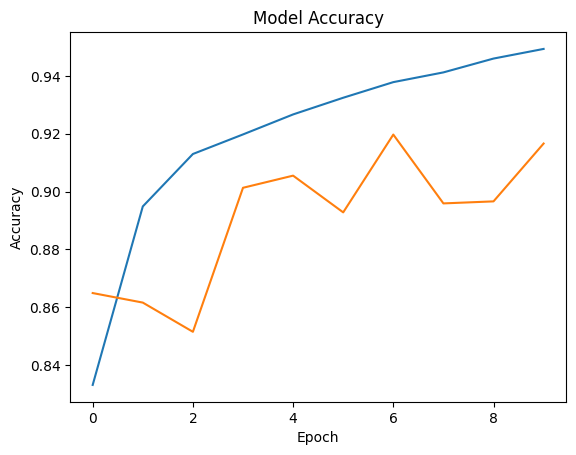

In [8]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
# Confusion matrix for the history resnet model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, resnet_model.predict(X_test).argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# **ResNET 101**

In [9]:
def identity_block(x, filters):
    # Identity block
    shortcut = x
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1))(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, (3, 3), padding='same')(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1))(x)
    x = layers.BatchNormalization(axis=3)(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

def convolutional_block(x, filters, strides=(2, 2)):
    # Convolutional block
    shortcut = x
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), strides=strides)(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, (3, 3), padding='same')(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1))(x)
    x = layers.BatchNormalization(axis=3)(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides)(shortcut)
    shortcut = layers.BatchNormalization(axis=3)(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [10]:
def ResNet101(input_shape=(28, 28, 1), classes=102):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.ZeroPadding2D(padding=(3, 3))(inputs)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = convolutional_block(x, filters=[64, 64, 256], strides=(1, 1))
    for _ in range(2):
        x = identity_block(x, filters=[64, 64, 256])

    x = convolutional_block(x, filters=[128, 128, 512])
    for _ in range(3):
        x = identity_block(x, filters=[128, 128, 512])

    x = convolutional_block(x, filters=[256, 256, 1024])
    for _ in range(22):
        x = identity_block(x, filters=[256, 256, 1024])

    x = convolutional_block(x, filters=[512, 512, 2048])
    for _ in range(2):
        x = identity_block(x, filters=[512, 512, 2048])

    x = layers.GlobalAveragePooling2D()(x) # Changed to GlobalAveragePooling2D
    x = layers.Flatten()(x)
    outputs = layers.Dense(classes, activation='softmax', name='fc102')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='ResNet101')
    return model

resnet101_model = ResNet101(input_shape=(28, 28, 1), classes=102)
resnet101_model.summary()

Model: "ResNet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 34, 34, 1) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 14, 14,    │      3,200 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 7, 7, 64)  │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 7, 7, 64)  │      4,160 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ activation_10[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 7, 7, 256) │     16,640 │ activation_11[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 7, 7, 256) │     16,640 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 256) │      1,024 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 256) │      1,024 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 7, 7, 256) │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 7, 7, 256) │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                 

 Total params: 42,860,902 (163.50 MB)

 Trainable params: 42,755,558 (163.10 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [11]:
resnet101_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [12]:
history_resnet101 = resnet101_model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 209s 64ms/step - accuracy: 0.6515 - loss: 1.2453 - val_accuracy: 0.3301 - val_loss: 2.1829
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.6247 - loss: 1.2696 - val_accuracy: 0.4757 - val_loss: 28.0144
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.7048 - loss: 0.8372 - val_accuracy: 0.7527 - val_loss: 0.6619
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.7435 - loss: 0.8291 - val_accuracy: 0.6442 - val_loss: 4.2306
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.6676 - loss: 1.0409 - val_accuracy: 0.6065 - val_loss: 1.3782
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.7521 - loss: 0.6970 - val_accuracy: 0.6750 - val_loss: 0.8303
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.7780 - loss: 0.6812 - val_accuracy: 0.7994 - val_loss: 0.5559
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.7

Text(0.5, 0, 'Epoch')

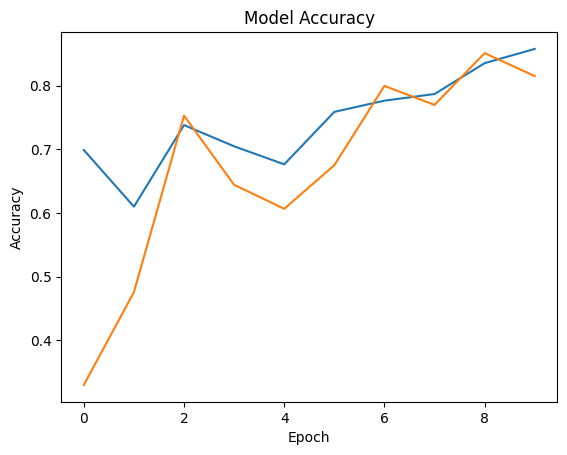

In [13]:
plt.plot(history_resnet101.history['accuracy'])
plt.plot(history_resnet101.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

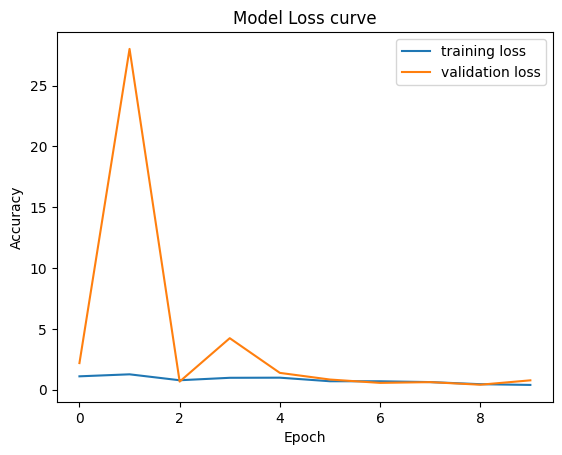

In [37]:
plt.plot(history_resnet101.history['loss'])
plt.plot(history_resnet101.history['val_loss'])
plt.title('Model Loss curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step


Text(0.5, 1.0, 'Confusion Matrix')

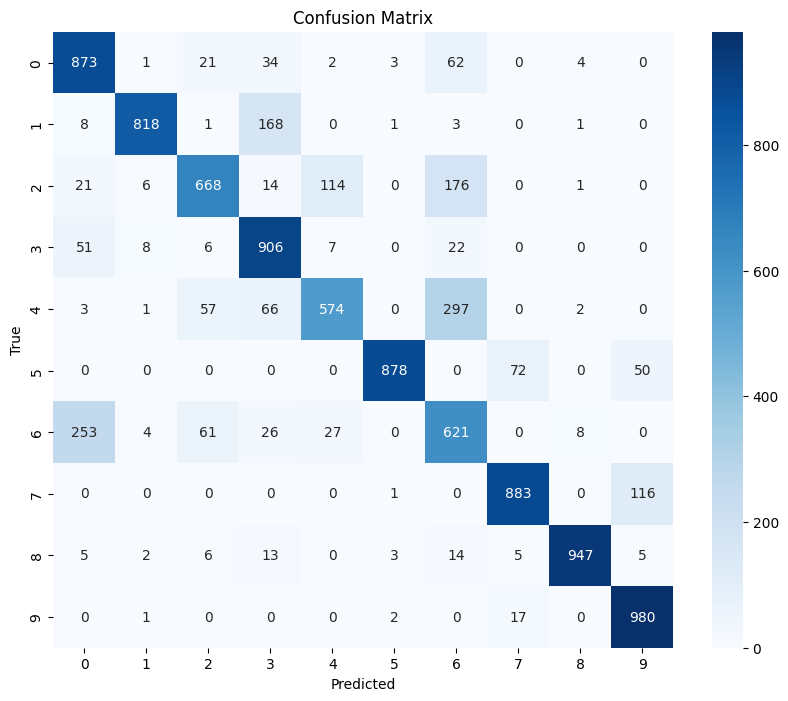

In [35]:
# Confusion matrix for the history ResNet101 model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, resnet101_model.predict(X_test).argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# **DenseNet 169**

In [20]:
def densenet_block(x, growth_rate):
    # DenseNet block (Bottleneck layer)
    x1 = layers.BatchNormalization(axis=3)(x)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, (1, 1), use_bias=False)(x1)
    x1 = layers.BatchNormalization(axis=3)(x1)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.Conv2D(growth_rate, (3, 3), padding='same', use_bias=False)(x1)
    return x1

def transition_layer(x, reduction):
    # Transition layer
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(reduction, (1, 1), use_bias=False)(x)
    # Removed AveragePooling2D layer due to small input size
    return x

def DenseNet169(input_shape=(28, 28, 1), classes=10):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.ZeroPadding2D(padding=(3, 3))(inputs)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), use_bias=False)(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Block 1 (6 layers)
    for _ in range(6):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 128)

    # Block 2 (12 layers)
    for _ in range(12):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 256)

    # Block 3 (32 layers)
    for _ in range(32):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 512)

    # Block 4 (32 layers)
    for _ in range(32):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 1024)

    # Block 5 (32 layers)
    for _ in range(32):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)

    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='DenseNet169')
    return model

densenet169_model = DenseNet169(input_shape=(28, 28, 1), classes=10)
densenet169_model.summary()

Model: "DenseNet169"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 34, 34, 1) │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_350 (Conv2D) │ (None, 14, 14,    │      3,136 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_350[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_343      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 7, 7, 64)  │          0 │ activation_343[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ max_pooling2d_2[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_344      │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_351 (Conv2D) │ (None, 7, 7, 128) │      8,192 │ activation_344[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_351[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_345      │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_352 (Conv2D) │ (None, 7, 7, 32)  │     36,864 │ activation_345[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_114     │ (None, 7, 7, 96)  │          0 │ max_pooling2d_2[… │
│ (Concatenate)       │                   │            │ conv2d_352[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 96)  │        384 │ concatenate_114[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_346      │ (None, 7, 7, 96)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_353 (Conv2D) │ (None, 7, 7, 128) │     12,288 │ activation_346[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_353[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_347      │ (None, 7, 7, 128) │          0 │ batch_normalizat

 Total params: 21,149,642 (80.68 MB)

 Trainable params: 20,890,122 (79.69 MB)

 Non-trainable params: 259,520 (1013.75 KB)

In [23]:
densenet169_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [24]:
history_densenet169 = densenet169_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 784s 222ms/step - accuracy: 0.7663 - loss: 0.6422 - val_accuracy: 0.8344 - val_loss: 0.4247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 346s 179ms/step - accuracy: 0.8726 - loss: 0.3424 - val_accuracy: 0.8816 - val_loss: 0.3246
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 343s 183ms/step - accuracy: 0.8946 - loss: 0.2878 - val_accuracy: 0.8875 - val_loss: 0.3100
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 375s 179ms/step - accuracy: 0.9026 - loss: 0.2632 - val_accuracy: 0.8876 - val_loss: 0.3193
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 389s 183ms/step - accuracy: 0.9151 - loss: 0.2275 - val_accuracy: 0.9061 - val_loss: 0.2621
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 342s 183ms/step - accuracy: 0.9199 - loss: 0.2109 - val_accuracy: 0.9095 - val_loss: 0.2533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 342s 182ms/step - accuracy: 0.9295 - loss: 0.1884 - val_accuracy: 0.9073 - val_loss: 0.2819
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 390s 187ms/step - ac

Text(0.5, 0, 'Epoch')

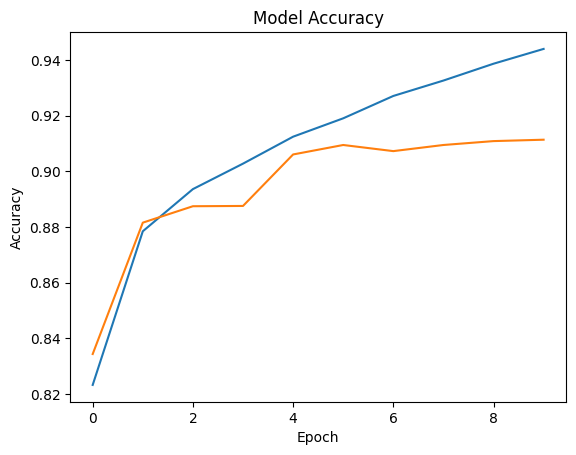

In [27]:
plt.plot(history_densenet169.history['accuracy'])
plt.plot(history_densenet169.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

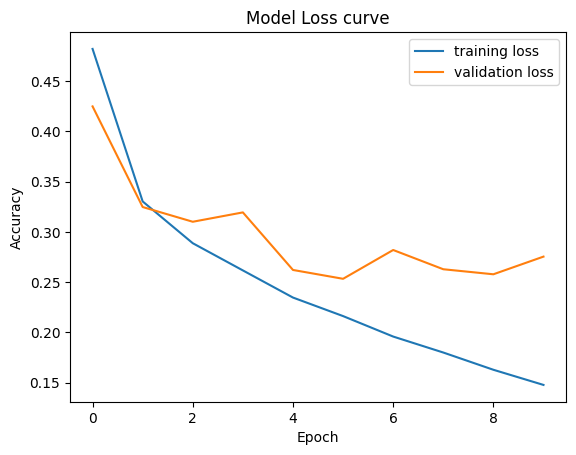

In [32]:
plt.plot(history_densenet169.history['loss'])
plt.plot(history_densenet169.history['val_loss'])
plt.title('Model Loss curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 120ms/step


Text(0.5, 1.0, 'Confusion Matrix')

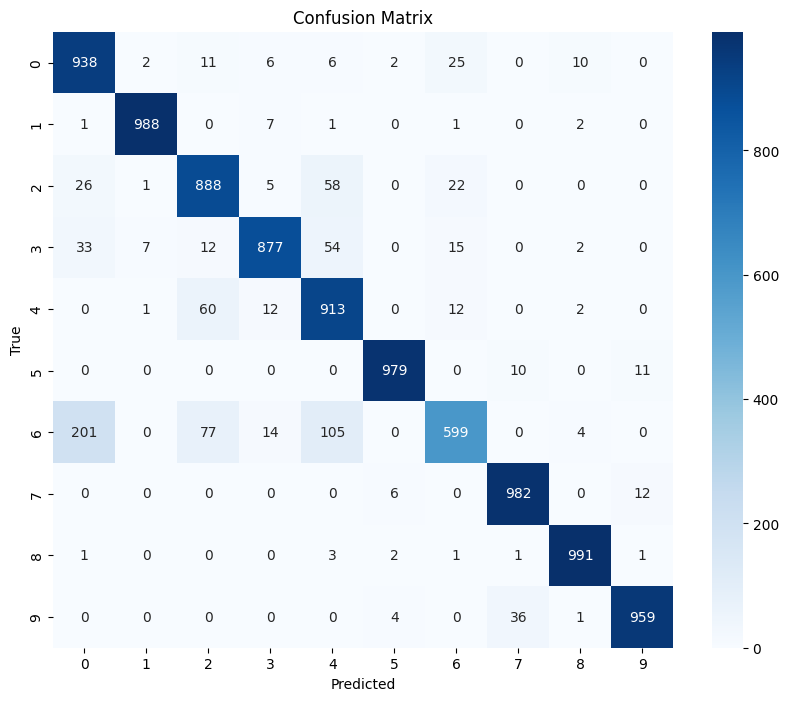

In [33]:
# Confusion matrix for the history DenseNet169 model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, densenet169_model.predict(X_test).argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# **DenseNET 121**

In [38]:
def DenseNet121(input_shape=(28, 28, 1), classes=10):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.ZeroPadding2D(padding=(3, 3))(inputs)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), use_bias=False)(x)
    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Block 1 (6 layers)
    for _ in range(6):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 128)

    # Block 2 (12 layers)
    for _ in range(12):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 256)

    # Block 3 (24 layers)
    for _ in range(24):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)
    x = transition_layer(x, 512)

    # Block 4 (16 layers)
    for _ in range(16):
        conv_output = densenet_block(x, 32)
        x = layers.concatenate([x, conv_output], axis=3)


    x = layers.BatchNormalization(axis=3)(x)
    x = layers.Activation('relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='DenseNet121')
    return model

densenet121_model = DenseNet121(input_shape=(28, 28, 1), classes=10)
densenet121_model.summary()

Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 34, 34, 1) │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_583 (Conv2D) │ (None, 14, 14,    │      3,136 │ zero_padding2d_3… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_583[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_577      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ activation_577[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ max_pooling2d_3[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_578      │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_584 (Conv2D) │ (None, 7, 7, 128) │      8,192 │ activation_578[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_584[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_579      │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_585 (Conv2D) │ (None, 7, 7, 32)  │     36,864 │ activation_579[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_228     │ (None, 7, 7, 96)  │          0 │ max_pooling2d_3[… │
│ (Concatenate)       │                   │            │ conv2d_585[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 96)  │        384 │ concatenate_228[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_580      │ (None, 7, 7, 96)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_586 (Conv2D) │ (None, 7, 7, 128) │     12,288 │ activation_580[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_586[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_581      │ (None, 7, 7, 128) │          0 │ batch_normalizat

 Total params: 7,041,482 (26.86 MB)

 Trainable params: 6,957,834 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [39]:
densenet121_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [40]:
history_densenet121 = densenet121_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 302s 80ms/step - accuracy: 0.7753 - loss: 0.6050 - val_accuracy: 0.8621 - val_loss: 0.3851
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step - accuracy: 0.8780 - loss: 0.3273 - val_accuracy: 0.8296 - val_loss: 0.4405
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 128s 68ms/step - accuracy: 0.8988 - loss: 0.2707 - val_accuracy: 0.8741 - val_loss: 0.3521
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 68ms/step - accuracy: 0.9107 - loss: 0.2410 - val_accuracy: 0.8853 - val_loss: 0.3255
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 65ms/step - accuracy: 0.9195 - loss: 0.2157 - val_accuracy: 0.8929 - val_loss: 0.3011
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.9274 - loss: 0.1976 - val_accuracy: 0.9044 - val_loss: 0.2533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 65ms/step - accuracy: 0.9336 - loss: 0.1782 - val_accuracy: 0.9057 - val_loss: 0.2777
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 

Text(0.5, 0, 'Epoch')

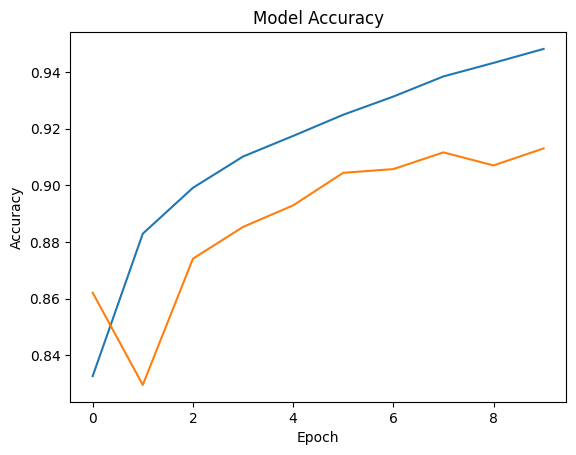

In [42]:
plt.plot(history_densenet121.history['accuracy'])
plt.plot(history_densenet121.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

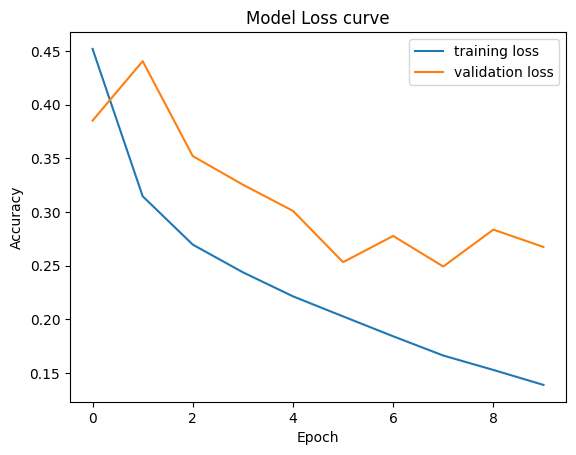

In [43]:
plt.plot(history_densenet121.history['loss'])
plt.plot(history_densenet121.history['val_loss'])
plt.title('Model Loss curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')

# **Conclusion**
##### From the above we can conclude that the resNet 50 is best model for this data set as it is giving the accuracy of 91.66 % which better than the other model what we use like
- ResNet 101 - 81%
- DenseNet 169 - 91.14%
- DenseNet 121 - 91.30%

##### And as we see the confusion matrix of each the model we can clearly see the difference between the model dataset.

##### As we see the architecture of dataset as mention above gives us the overview of the different dataset based on the dense of layer in denseNet and skip pointers in ResNet model

## Trade-offs between accuracy and computational cost

Based on the results from testing ResNet50, ResNet101, DenseNet169, and DenseNet121 on the Fashion MNIST dataset, we can discuss the trade-offs between accuracy and computational cost.

From the training outputs, we see the following final validation accuracies after 10 epochs:

*   **ResNet50:** Approximately 91.66%
*   **ResNet101:** Approximately 81.48%
*   **DenseNet169:** Approximately 91.14%
*   **DenseNet121:** Approximately 91.30%

And looking at the model summaries, we can see the number of trainable parameters as an indicator of model complexity and thus computational cost:

*   **ResNet50:** Approximately 176,842 trainable parameters.
*   **ResNet101:** Approximately 42,755,558 trainable parameters.
*   **DenseNet169:** Approximately 20,890,122 trainable parameters.
*   **DenseNet121:** Approximately 6,957,834 trainable parameters.

Here's a breakdown of the trade-offs observed:

*   **ResNet50 vs. ResNet101:** ResNet50 achieved a significantly higher accuracy (91.66%) compared to ResNet101 (81.48%) on this dataset. Although ResNet101 is a larger model with many more parameters, it did not perform better, which could be due to various factors like the model architecture being too complex for this relatively simple dataset, or needing more epochs or hyperparameter tuning. ResNet50 is also computationally much cheaper than ResNet101 due to having far fewer parameters. In this case, ResNet50 offers a better trade-off, providing higher accuracy at a much lower computational cost.

*   **DenseNet169 vs. DenseNet121:** DenseNet121 and DenseNet169 achieved similar validation accuracies (around 91%). However, DenseNet121 has significantly fewer parameters (approximately 6.95 million) compared to DenseNet169 (approximately 20.89 million). This suggests that for this dataset, DenseNet121 provides a better trade-off, offering comparable accuracy to DenseNet169 but with a considerably lower computational cost.

*   **ResNet vs. DenseNet:** Comparing the best-performing ResNet (ResNet50 at ~91.66%) and the best-performing DenseNet (DenseNet121 at ~91.30%), they achieved very similar accuracies. However, DenseNet121 has significantly more parameters (approximately 6.95 million) than ResNet50 (approximately 176 thousand). This indicates that while both architectures can achieve similar performance on this dataset, ResNet50 is much more computationally efficient in terms of the number of parameters.

**Conclusion:**

Based on your experiments, **ResNet50 appears to offer the best trade-off** among the tested models for the Fashion MNIST dataset. It achieves a high accuracy comparable to the DenseNet models while having a significantly lower number of trainable parameters, which translates to lower computational cost and faster training times. ResNet101, despite its larger size, did not perform as well on this dataset.

This highlights that a more complex model (like ResNet101 or larger DenseNets) doesn't always guarantee better performance, especially on simpler datasets. The optimal model choice often involves considering both accuracy and computational resources.

In [2]:
import numexpr

In [9]:
a = "(9-(10-(10-0-(3+(8+(0+(8-(10-8-(7-(2+(5+(6+(10+(3+(8+(3-(9+(1+(10+(1-(1+(6-2+0+(10-(9-(3-(3-9-(1-(7+(4-(2+(2-(10+(3+(7-(1-(4+(1+(1-(10-(5-(9+(9-4-(5-(1+8-(2-(1+(1-10-(4-(1+(4-(7)-(3-(8)+(5+5-(5-(9-(8+(8-4-1+(0-(1+(1+(10-(7+(2-(5-(4-(6+(2+(1-(2-(9+8+(2+(9-(9-(7+(10+1+(5)))-(2-(8+3+(5-(7-(3+(9)+(10+(0+(8-(1-(9)-(0+10-(3+(9-(0-(5-(7-(4-4+1+(7)-(10+(5+(9-(3+(5+(6-(0-(7-(1-(4+(6+(4-2-(4+(9-(6+9-8+1+(5+(7-9+3)+(10-(10+(2+(0-(5-(2+(10-(4-5-(7-(4-(7+(4)+6+10+(2-(7+(2))+(1)+(5-(7)-(10-(5+(7-(6-(2+(1-4)+(10-(5)+(4+(10+(4+(0+(10+(8-(8+(6+5-(1-(6-(1-(2+(4+(9-(3+(1+(10+(4)+(0+(3-(2-(9-(2-(3-(4-(2+(7-(6-(5+(7+(5+(5-(4+(0-(7+(2-(7+(9)-(6-(10)+(7+(2-(9-(9)+(4+(1-(8+(2-0-(2+(2+10)-(7-9-(9+(8-(5-8-(5)+(6+(10-(3-(2-(2+(7-2+(9+(3+(9+(2-(8+(5-(4+(4-(1-(9+(0+(6-(4-(3+(5-(2-(4-(6+(0+(4+3)-(8-(6+(9+(1+(2)-(8-(1+1+(5+(4-(3-(1-(7-4+(6+(9+(1+(4)+(6+(4+(2+(7-(1+(4-(8+(6+(8-(9-(2)-3-(0-(0)+(5+(7-(8)+(8-(2+(1)+1+(3+(6-(10-(2-4-(2-(2)+(8)+(3-(1-(1)+(6+(1+(9+(9+(5)-(4+(9+(10)+(0-(3+(3+0)+(6)-(6+(6)+(4-(8-1-5-(6)-(0))-(3)+(3-(3-(8-(10-(0-(4+(7)+(6-4))+1-(2-(1-(0-(0+(1-(0)-0+(5+(10-(2-(9-(9-10)+(3+(5-(6-(6-9-(5+5))+(7+(0)-(2-(7+2+(7-(2+(7+(4-(10+(4+(10-(3-(0-2+(9+(4-4-(3-(2)+(8+(5)+(1+1-(7+(3+(10+5-(0+(10-(9+(8-(0-(0+(8-(1+(0)+(6+(5+(5+(9)))+(4-(1-(3+(7+(9+(8-(1-8-(8+(0+(1+(1-(1)+(7+(6-(7-(8+(10)+1+(0-(10)+(8+(7+(10+(6+(10+(6)-(2+(2+(10-(8)-(5)))+(9-(1)+(4)+(5)-(6-(9)-(1+(6-(9+(10)+2-(4+(9-(4+1)-(0-(9)-(3)+(0)+(10)))+9)+(6+4+(6))+(5-(9))-(9-(2-(6+(7))-(6-(3+(5+(5-(0)-(5+(6-(5+(9-(2+(9+(1+(0+2+(7)-(3-(5+(2)+(4)+(6+(7-(3-(4)+(10+(4))+(3))-(3-(2)-(2+(2+(10+(3)+(3+(5)-(3-(0+(1)+(6+(4-(4)-(7-(9-(9)+(1)+(4)+(7))-(9))))-(3-(1+5-7-(7))-(4+(3+(7-(9+(8)-(9+(8-(3)+(10-(1)+(5)-(2-(4)+(0-(10-(7-(10+(1)+(1)-(4)-(10)))+(7)+(4-4)+0+9-(6))-(6+(5)))))-(8-(6)-(10+(5-(8)-(10+(3+(0+(6-(9)-(1)))-(0)-(9+(0+(1+(8+2-(4-(9-(4+(3+4)-(10+(1-(5)+(10-(4-(6-(4-(2+(4)-(9)-(4))))-3))))+(9)+(9+(0-(1+(5-(5+(7)-6-(8-(3-(3+(1)-(9-(7-(6)))-(2+(1))-(1+(2+(10))))+(6)+(0+(9-(1)-(10)))+(10-(1-(1)))-(0+(0-(2-(4-(6+(1))+(0)+(5)-(5+(5)-(4+(6)-(5)+(1-(7))))+(8)-(7))-3))-(7+(7+(9+(0+(10)-(7-(0-(2)-(6))-(2+(10)))+(7)+(3))+(8-(8+(10)-(8)+(0+(6-(2)-(1))+(3+(10+(10-(4+(7-(2)-(9-(2+(8))))+(7)-(7+10+(9-(2)+(0))-(6+(1)))+(10)+(2)-(7)-(4)-(10+(3-(6))))+(8-(1))-(10)))+(5+(3-(0-(1-(2+(3-(6-(4)-(1)+(4+(7+(3)-(7)+(4-(9))+(0-(4)+(9+(3-(9)+(4-(10+(6+(4)))+(4))+(10+(0-3-(8+(0-(6))-(5))-(9))-(6))))+2))+6+(6)+(1-(6))-(7-(1))-(8)+(9-(8))+(4)))-(0+7-(1)))-(2))+(0)))+(4-(7))-(5)-(8)-4+(1-(3-(8+(2+0)+(7)))))))-(4-(2))+(9))))+(7)-(2-(10+(4)-(8+(7)+(5-(4)-(6+6))-(2+(6)-(2+(4-(2-(8-(4)-(7+(5)-(10-(7)))))-(10+(9+(8)-(10)+(3-(7+(4+(2+(5)-(10+7+(2-(10)-(10+(3))+(0-(10+(8+(4+(7-(2)+(3+9))))+(7-(6+(2)-(2)+7+(5+(7+(10+(5-(4)-2+(5)+(1))+(0))))-(9))-5-(8)-(9-(4)-(10))-(8-(5)-(10)-7)+(5))-(4)))))+6+3+(3+(6+(9)))-10+(6)+(0)))))+(7)))+(1-(5)+(3-(3+6))+(5)+(7)-(9-(1))+(4+(1))+(2)))-(3))-(10)+(1)))))))))+(3)+2+(8-(4)))-(1))+(6-(8-(0)-(8-(0))-(2-(4+2)))-(9+1)))-(8-(8+(1-8-(7))))+7-(5+(5+(6+(10)+(8)))))))-(4))))-(4)-(6)+(10)-(5)))+(0+(2+(4))-(4-(2)+(0-(10-(4))))))+3-(10)))-(9+(9-(8-(7)-4))))+(6))-(4-(9))))-(1))+(10))))-(0+(9+7-(1)))))-(7)-(4)))-(9))))-7))))+(9))+(10))-(8-(9)))+(8))-(6)-(4)-(8)))))))))))))-(7)))))+(2-(6)-(0))))-(0)-(5+(9)+(9))+(3-(9))))+(8))))))))-(0-(0))+(7-(2))))))))-(6))-(8+(9))-(9+(2))-(2)+(9))-(4))+(7)-(1)-(6))-(2-0)))))))-(0)))))-(8+(0-(5))))+(9)-(1-(0)-(3)))-(3)-(0)))+(4)+(6))))-(5)+(1-(5)))))+(10))))-(5)+(0))))))-(6)))))))+(1))))))))-(5)))))))))+(8))))))))))))))))))-(7)+(10)))))))))))))-(4))))))-(10)-(4))+(1)+(3))-(1))))+(9))))))))+(2-(7-(4-(3+(0))))-(10)))))+0))))+(10)))))+(4)))))))))))+(3)))))))-(5)))))+(3)))))))))))))-(7)-(5-(2+(9))-(0))+(4)))+(10)))))-(1)))-(0))+(1))-(8+(10))))))-(10)-(10+(9)+(2))))-(1)))-(2))))+(4+(5))))))+(8))))))))))))))))))))))-(7)))-(3)))))))+(1))))-(7)-(3)+(4))))))-(6)))))))-(9-(3)))))))))))+(8))))))))))+(6))))))))))))))))))))))))))))))))))+(5))+(7))))))))))))))))))))))))-(10))))))+9)))))))"
b = eval(a)
print(b)

SyntaxError: too many nested parentheses (<string>, line 1)

In [10]:
from sympy import sympify

  # Replace with a simplified version
expr = sympify(a)
print(expr.evalf())

SympifyError: Sympify of expression 'could not parse '(9-(10-(10-0-(3+(8+(0+(8-(10-8-(7-(2+(5+(6+(10+(3+(8+(3-(9+(1+(10+(1-(1+(6-2+0+(10-(9-(3-(3-9-(1-(7+(4-(2+(2-(10+(3+(7-(1-(4+(1+(1-(10-(5-(9+(9-4-(5-(1+8-(2-(1+(1-10-(4-(1+(4-(7)-(3-(8)+(5+5-(5-(9-(8+(8-4-1+(0-(1+(1+(10-(7+(2-(5-(4-(6+(2+(1-(2-(9+8+(2+(9-(9-(7+(10+1+(5)))-(2-(8+3+(5-(7-(3+(9)+(10+(0+(8-(1-(9)-(0+10-(3+(9-(0-(5-(7-(4-4+1+(7)-(10+(5+(9-(3+(5+(6-(0-(7-(1-(4+(6+(4-2-(4+(9-(6+9-8+1+(5+(7-9+3)+(10-(10+(2+(0-(5-(2+(10-(4-5-(7-(4-(7+(4)+6+10+(2-(7+(2))+(1)+(5-(7)-(10-(5+(7-(6-(2+(1-4)+(10-(5)+(4+(10+(4+(0+(10+(8-(8+(6+5-(1-(6-(1-(2+(4+(9-(3+(1+(10+(4)+(0+(3-(2-(9-(2-(3-(4-(2+(7-(6-(5+(7+(5+(5-(4+(0-(7+(2-(7+(9)-(6-(10)+(7+(2-(9-(9)+(4+(1-(8+(2-0-(2+(2+10)-(7-9-(9+(8-(5-8-(5)+(6+(10-(3-(2-(2+(7-2+(9+(3+(9+(2-(8+(5-(4+(4-(1-(9+(0+(6-(4-(3+(5-(2-(4-(6+(0+(4+3)-(8-(6+(9+(1+(2)-(8-(1+1+(5+(4-(3-(1-(7-4+(6+(9+(1+(4)+(6+(4+(2+(7-(1+(4-(8+(6+(8-(9-(2)-3-(0-(0)+(5+(7-(8)+(8-(2+(1)+1+(3+(6-(10-(2-4-(2-(2)+(8)+(3-(1-(1)+(6+(1+(9+(9+(5)-(4+(9+(10)+(0-(3+(3+0)+(6)-(6+(6)+(4-(8-1-5-(6)-(0))-(3)+(3-(3-(8-(10-(0-(4+(7)+(6-4))+1-(2-(1-(0-(0+(1-(0)-0+(5+(10-(2-(9-(9-10)+(3+(5-(6-(6-9-(5+5))+(7+(0)-(2-(7+2+(7-(2+(7+(4-(10+(4+(10-(3-(0-2+(9+(4-4-(3-(2)+(8+(5)+(1+1-(7+(3+(10+5-(0+(10-(9+(8-(0-(0+(8-(1+(0)+(6+(5+(5+(9)))+(4-(1-(3+(7+(9+(8-(1-8-(8+(0+(1+(1-(1)+(7+(6-(7-(8+(10)+1+(0-(10)+(8+(7+(10+(6+(10+(6)-(2+(2+(10-(8)-(5)))+(9-(1)+(4)+(5)-(6-(9)-(1+(6-(9+(10)+2-(4+(9-(4+1)-(0-(9)-(3)+(0)+(10)))+9)+(6+4+(6))+(5-(9))-(9-(2-(6+(7))-(6-(3+(5+(5-(0)-(5+(6-(5+(9-(2+(9+(1+(0+2+(7)-(3-(5+(2)+(4)+(6+(7-(3-(4)+(10+(4))+(3))-(3-(2)-(2+(2+(10+(3)+(3+(5)-(3-(0+(1)+(6+(4-(4)-(7-(9-(9)+(1)+(4)+(7))-(9))))-(3-(1+5-7-(7))-(4+(3+(7-(9+(8)-(9+(8-(3)+(10-(1)+(5)-(2-(4)+(0-(10-(7-(10+(1)+(1)-(4)-(10)))+(7)+(4-4)+0+9-(6))-(6+(5)))))-(8-(6)-(10+(5-(8)-(10+(3+(0+(6-(9)-(1)))-(0)-(9+(0+(1+(8+2-(4-(9-(4+(3+4)-(10+(1-(5)+(10-(4-(6-(4-(2+(4)-(9)-(4))))-3))))+(9)+(9+(0-(1+(5-(5+(7)-6-(8-(3-(3+(1)-(9-(7-(6)))-(2+(1))-(1+(2+(10))))+(6)+(0+(9-(1)-(10)))+(10-(1-(1)))-(0+(0-(2-(4-(6+(1))+(0)+(5)-(5+(5)-(4+(6)-(5)+(1-(7))))+(8)-(7))-3))-(7+(7+(9+(0+(10)-(7-(0-(2)-(6))-(2+(10)))+(7)+(3))+(8-(8+(10)-(8)+(0+(6-(2)-(1))+(3+(10+(10-(4+(7-(2)-(9-(2+(8))))+(7)-(7+10+(9-(2)+(0))-(6+(1)))+(10)+(2)-(7)-(4)-(10+(3-(6))))+(8-(1))-(10)))+(5+(3-(0-(1-(2+(3-(6-(4)-(1)+(4+(7+(3)-(7)+(4-(9))+(0-(4)+(9+(3-(9)+(4-(10+(6+(4)))+(4))+(10+(0-3-(8+(0-(6))-(5))-(9))-(6))))+2))+6+(6)+(1-(6))-(7-(1))-(8)+(9-(8))+(4)))-(0+7-(1)))-(2))+(0)))+(4-(7))-(5)-(8)-4+(1-(3-(8+(2+0)+(7)))))))-(4-(2))+(9))))+(7)-(2-(10+(4)-(8+(7)+(5-(4)-(6+6))-(2+(6)-(2+(4-(2-(8-(4)-(7+(5)-(10-(7)))))-(10+(9+(8)-(10)+(3-(7+(4+(2+(5)-(10+7+(2-(10)-(10+(3))+(0-(10+(8+(4+(7-(2)+(3+9))))+(7-(6+(2)-(2)+7+(5+(7+(10+(5-(4)-2+(5)+(1))+(0))))-(9))-5-(8)-(9-(4)-(10))-(8-(5)-(10)-7)+(5))-(4)))))+6+3+(3+(6+(9)))-10+(6)+(0)))))+(7)))+(1-(5)+(3-(3+6))+(5)+(7)-(9-(1))+(4+(1))+(2)))-(3))-(10)+(1)))))))))+(3)+2+(8-(4)))-(1))+(6-(8-(0)-(8-(0))-(2-(4+2)))-(9+1)))-(8-(8+(1-8-(7))))+7-(5+(5+(6+(10)+(8)))))))-(4))))-(4)-(6)+(10)-(5)))+(0+(2+(4))-(4-(2)+(0-(10-(4))))))+3-(10)))-(9+(9-(8-(7)-4))))+(6))-(4-(9))))-(1))+(10))))-(0+(9+7-(1)))))-(7)-(4)))-(9))))-7))))+(9))+(10))-(8-(9)))+(8))-(6)-(4)-(8)))))))))))))-(7)))))+(2-(6)-(0))))-(0)-(5+(9)+(9))+(3-(9))))+(8))))))))-(0-(0))+(7-(2))))))))-(6))-(8+(9))-(9+(2))-(2)+(9))-(4))+(7)-(1)-(6))-(2-0)))))))-(0)))))-(8+(0-(5))))+(9)-(1-(0)-(3)))-(3)-(0)))+(4)+(6))))-(5)+(1-(5)))))+(10))))-(5)+(0))))))-(6)))))))+(1))))))))-(5)))))))))+(8))))))))))))))))))-(7)+(10)))))))))))))-(4))))))-(10)-(4))+(1)+(3))-(1))))+(9))))))))+(2-(7-(4-(3+(0))))-(10)))))+0))))+(10)))))+(4)))))))))))+(3)))))))-(5)))))+(3)))))))))))))-(7)-(5-(2+(9))-(0))+(4)))+(10)))))-(1)))-(0))+(1))-(8+(10))))))-(10)-(10+(9)+(2))))-(1)))-(2))))+(4+(5))))))+(8))))))))))))))))))))))-(7)))-(3)))))))+(1))))-(7)-(3)+(4))))))-(6)))))))-(9-(3)))))))))))+(8))))))))))+(6))))))))))))))))))))))))))))))))))+(5))+(7))))))))))))))))))))))))-(10))))))+9)))))))'' failed, because of exception being raised:
TokenError: ('too many nested parentheses', (1, 787))